In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path

In [2]:
path = Path.cwd().parent / 'data'
nat = gpd.read_file(path / 'gb_shape.geojson')
zon = gpd.read_file(path / 'prerun' / 'zonal_layout.geojson')
nod = gpd.read_file(path / 'regions_onshore_s.geojson')

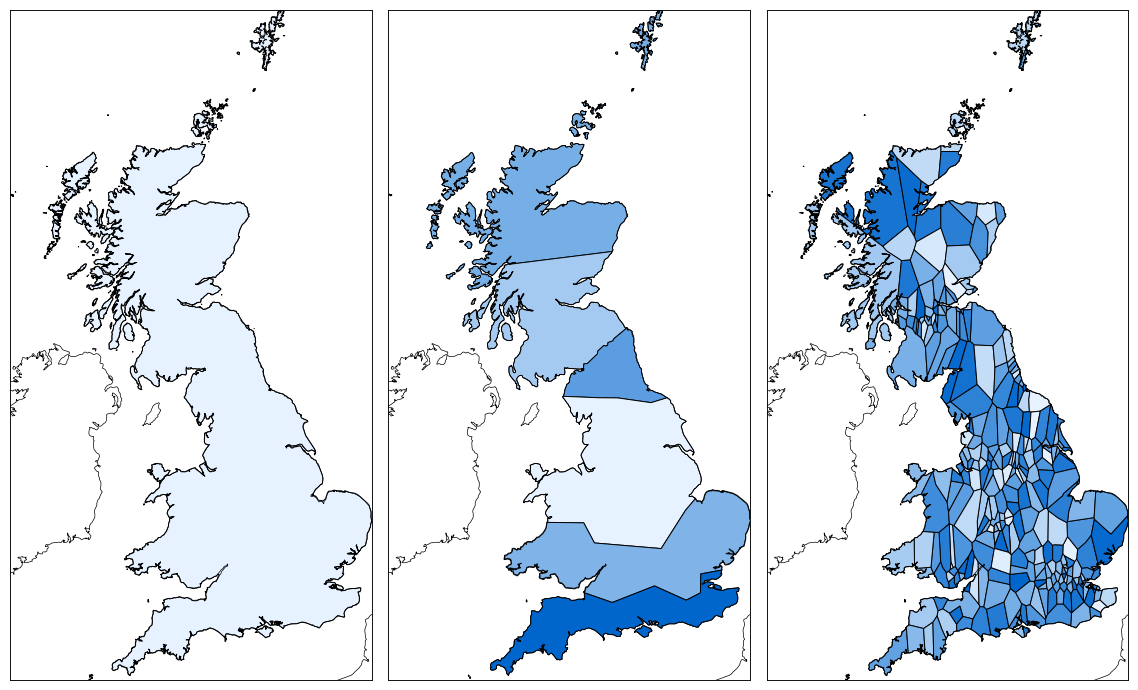

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create a figure with 3 subplots in a row with decreased width relative to height
fig, axes = plt.subplots(1, 3, figsize=(11.5, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Create minimalist colormap - light blue to dark blue
colors = ['#e6f2ff', '#0066cc']  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list('minimalist_blue', colors, N=100)

# Generate random values for each dataset
nat['value'] = np.random.uniform(0, 100, len(nat))
zon['value'] = np.random.uniform(0, 100, len(zon))
nod['value'] = np.random.uniform(0, 100, len(nod))

# Plot each geodataframe with random values and minimalist colormap
nat.plot(ax=axes[0], column='value', cmap=cmap, edgecolor='black', linewidth=0.7)
zon.plot(ax=axes[1], column='value', cmap=cmap, edgecolor='black', linewidth=0.7)
nod.plot(ax=axes[2], column='value', cmap=cmap, edgecolor='black', linewidth=0.7)

# Set consistent view and add thin frames without ticks
for ax in axes:
    ax.set_extent([nat.total_bounds[0], nat.total_bounds[2], 
                  nat.total_bounds[1], nat.total_bounds[3]], crs=ccrs.PlateCarree())
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    ax.tick_params(length=0, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    ax.coastlines(linewidth=0.5)  # Add thinner coastlines for reference

plt.tight_layout()
plt.savefig('layouts.pdf', bbox_inches='tight')
plt.show()


In [8]:
import pypsa
from pathlib import Path
import pandas as pd

nat = pypsa.Network(Path.cwd().parent / 'results' / '2024-01-01' / 'network_flex_s_national_solved.nc')
zon = pypsa.Network(Path.cwd().parent / 'results' / '2024-01-01' / 'network_flex_s_zonal_solved.nc')

INFO:pypsa.io:Imported network network_flex_s_national_solved.nc has buses, carriers, generators, links, loads, storage_units
INFO:pypsa.io:Imported network network_flex_s_zonal_solved.nc has buses, carriers, generators, links, loads, storage_units


In [15]:
thermal_units =  nat.generators.index[nat.generators.carrier.isin(['fossil', 'coal', 'biomass'])]

In [19]:
mp = pd.read_csv(
    Path.cwd().parent / 'summaries' / 'marginal_prices_summary_flex.csv', index_col=0, parse_dates=True, header=[0,1]
)

In [25]:
idx = pd.IndexSlice

print('national')
print(mp.loc['2024', idx['national', 'GB']].mean())
print(mp.loc['2024', idx['national', 'GB']].std())

print('zonal')
print(mp.loc['2024', idx['zonal', :]].mean().mean())
print(mp.loc['2024', idx['zonal', :]].std().value_counts())


national
75.94601891537305
29.10844434677642
zonal
71.70210774054303
38.431238    218
58.309431     44
58.470037     14
38.429484      7
58.414581      1
Name: count, dtype: int64
